In [0]:
!mkdir datasets
%cd datasets
!wget https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/Dados/BloodPressure01.txt --no-check-certificate
!wget https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/Dados/POP2006.csv --no-check-certificate
!wget https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/Dados/CampeonatoBrasileiro2014.txt --no-check-certificate
!wget https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/Dados/mtcars.csv --no-check-certificate
%cd ..

In [0]:
import pandas as pd

pressao = pd.read_csv('./datasets/BloodPressure01.txt', sep=",")
print(pressao.shape)
# 1:18 Seleciona apenas as 17 primeiras colunas, pois o python começa com index em 0
pressao = pressao.iloc[:, 0:18]
print(pressao.shape)
print(pressao.columns[0:18].values)

(500, 501)
(500, 18)
['sbp' 'gender' 'married' 'smoke' 'exercise' 'age' 'weight' 'height'
 'overwt' 'race' 'alcohol' 'trt' 'bmi' 'stress' 'salt' 'chldbear' 'income'
 'educatn']


In [0]:
print(max(pressao['sbp']))
print(min(pressao['sbp']))
print(max(pressao['weight']))
print(min(pressao['weight']))

In [0]:

#vamos plotar um grááfico de probabilidade decrescente (não sei se esse é o nome)
#Exemplo: Um experimento de sortear um número entre 0 e 100 será realizado 100.
#Esse experimento seráá executado em três cenários:
#Cenário 1: A probabilidade de sortear qualquer número nesse intervalo é igual
#Cenário 2: A probabilidade de sortear qualquer número nesse intervalo começa igual
#e aumenta linearmente para os números maiores
#Cenário 3: A probabilidade de sortear qualquer número nesse intervalo começa igual
#e aumenta exponencialmente para os núúmeros maiores
from random import randint, choices
num_experimentos = 10000
num_individuos = 100
population = [x+1 for  x in range(num_individuos)]
weightsIguais = [1]*num_individuos
weightsLinear = [1]*num_individuos
weightsQuadratico =  [1]*num_individuos


results_experiments = [[0]*num_experimentos, [0]*num_experimentos, [0]*num_experimentos]

def updateLinear(vet, value=1):
    tam_vet = len(vet)
    for i in range(tam_vet):
        vet[i] += i

def updateQuadratico(vet, value=1):
    tam_vet = len(vet)
    for i in range(tam_vet):
        vet[i] += i*i*value*value*value*i


for i in range(num_experimentos):
    results_experiments[0][i] = choices(population, weightsIguais, k=1)[0]
    results_experiments[1][i] = choices(population, weightsLinear, k=1)[0]
    results_experiments[2][i] = choices(population, weightsQuadratico, k=1)[0]
    updateLinear(weightsLinear, i)
    updateQuadratico(weightsQuadratico, i)


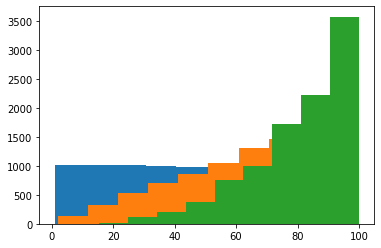

In [101]:
import matplotlib.pyplot as plt

group1 = plt.hist(results_experiments[0], bins = 10)
group2 = plt.hist(results_experiments[1], bins = 10)
group3 = plt.hist(results_experiments[2], bins = 10)
plt.show()

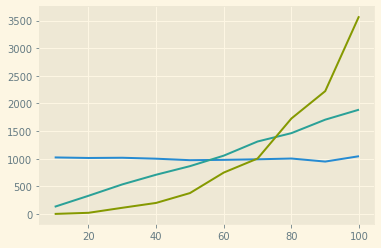

In [102]:
import matplotlib.pyplot as plt
import numpy as np
population = [(x+1)*10 for  x in range(int(num_individuos/10))]
with plt.style.context('Solarize_Light2'):
    plt.plot(population, group1[0])
    plt.plot(population, group2[0])
    plt.plot(population, group3[0])
plt.show()

In [104]:
len(results_experiments[0])

10000

In [0]:
#vamos mostrar a probabilidade de ser menor que 50 ao longo dos experimentos
total_ao_longo_dos_experimentos1 = [0]*num_experimentos
total_ao_longo_dos_experimentos2 = [0]*num_experimentos
total_ao_longo_dos_experimentos3 = [0]*num_experimentos
for i in range(num_experimentos):
    for j in range(i, num_experimentos):
        if(results_experiments[0][j] < 50):
            total_ao_longo_dos_experimentos1[i] += 1
        if(results_experiments[1][j] < 50):
            total_ao_longo_dos_experimentos2[i] += 1
        if(results_experiments[2][j] < 50):
            total_ao_longo_dos_experimentos3[i] += 1
    total_ao_longo_dos_experimentos1[i] = total_ao_longo_dos_experimentos1[i]/(num_experimentos - i)
    total_ao_longo_dos_experimentos2[i] = total_ao_longo_dos_experimentos2[i]/(num_experimentos - i)
    total_ao_longo_dos_experimentos3[i] = total_ao_longo_dos_experimentos3[i]/(num_experimentos - i)


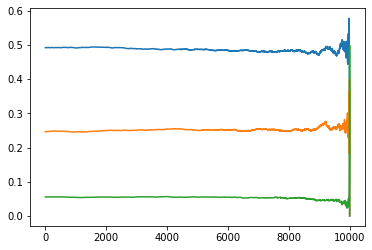

In [110]:
import numpy as np
import scipy.interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
x = [x+1 for x in range(num_experimentos)]
plt.plot(x, total_ao_longo_dos_experimentos1, '-')
plt.plot(x, total_ao_longo_dos_experimentos2, '-')
plt.plot(x, total_ao_longo_dos_experimentos3, '-')
plt.show()

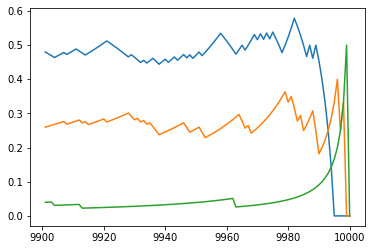

In [112]:
import numpy as np
import scipy.interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
x = [x+1 for x in range(num_experimentos)]
plt.plot(x[num_experimentos-100:num_experimentos], total_ao_longo_dos_experimentos1[num_experimentos-100:num_experimentos], '-')
plt.plot(x[num_experimentos-100:num_experimentos], total_ao_longo_dos_experimentos2[num_experimentos-100:num_experimentos], '-')
plt.plot(x[num_experimentos-100:num_experimentos], total_ao_longo_dos_experimentos3[num_experimentos-100:num_experimentos], '-')
plt.show()